# Transfer learning para classificar gatos e cachorros 

- Aplicaremos transferência de aprendizagem para reusar os pesos da rede ResNet 50
- Citação: Olga Russakovsky, Jia Deng, Hao Su, Jonathan Krause, Sanjeev Satheesh, Sean Ma, Zhiheng Huang, Andrej Karpathy, Aditya Khosla, Michael Bernstein, Alexander C. Berg and Li Fei-Fei. (* = equal contribution) ImageNet Large Scale Visual Recognition Challenge. arXiv:1409.0575, 2014.
- Artigo: https://arxiv.org/abs/1409.0575
- Base de dados: https://www.kaggle.com/tongpython/cat-and-dog

**Importação das bibliotecas**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import zipfile
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

**Importação do modelo com os pesos pré-trainados**

In [2]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102967424/102967424 [==============================] - 0s 0us/step


**Testes com o modelo pré-treinado**

- Visualização Imagenet: http://www.image-net.org/synset?wnid=n02835271
- Pesquisa por bicicleta
- https://lear.inrialpes.fr/people/gordo/ImageNetResults/sift1000_accuracy_withPrior/results_sift_0253.htm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Colab Notebooks/Transfer-Learning-Data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [84]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/watch.jpg', target_size = (224,224))

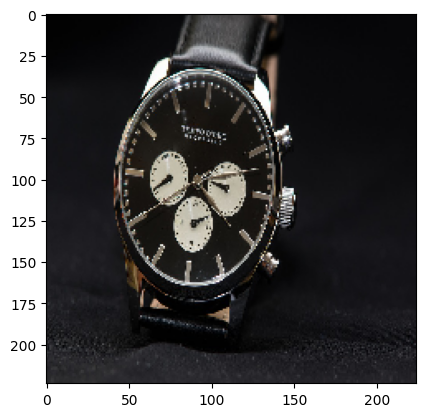

In [85]:
plt.imshow(sample_image)

In [86]:
type(sample_image)

PIL.Image.Image

In [87]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [88]:
type(sample_image)

numpy.ndarray

In [89]:
np.shape(sample_image)

(224, 224, 3)

In [90]:
sample_image = np.expand_dims(sample_image, axis = 0)

In [91]:
sample_image.shape

(1, 224, 224, 3)

In [92]:
sample_image.max()

255.0

In [93]:
sample_image.min()

0.0

In [94]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [95]:
sample_image.max()

151.061

In [96]:
sample_image.min()

-123.68

In [97]:
predictions = model.predict(sample_image)

1/1 [==============================] - 0s 25ms/step


In [98]:
print('predictions: ', tf.keras.applications.resnet50.decode_predictions(predictions, top = 5))

predictions:  [[('n04328186', 'stopwatch', 0.9936533), ('n02708093', 'analog_clock', 0.00489379), ('n03197337', 'digital_watch', 0.0007720898), ('n04548280', 'wall_clock', 0.00013768693), ('n02794156', 'barometer', 8.572183e-05)]]


**Transfer learning e reuso do modelo**

In [99]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 1s 0us/step


In [100]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [101]:
x = base_model.output

In [102]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [103]:
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)

In [104]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [105]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [107]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [110]:
for layer in model.layers[:175]:
  layer.trainable = False

In [111]:
for layer in model.layers[175:]:
  layer.trainable = True

In [112]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = 
                                                                tf.keras.applications.resnet50.preprocess_input)

In [113]:
train_generator = train_datagen.flow_from_directory('/content/Transfer Learning Data/train', 
                                                    target_size = (224, 224),
                                                    color_mode = 'rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 202 images belonging to 2 classes.


In [114]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [115]:
history = model.fit_generator(generator = train_generator,
                              epochs = 10)

<ipython-input-115-6508cde48507>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_generator,


Epoch 1/10
7/7 [==============================] - 9s 276ms/step - loss: 1.5478 - accuracy: 0.7178
Epoch 2/10
7/7 [==============================] - 1s 140ms/step - loss: 0.2587 - accuracy: 0.8960
Epoch 3/10
7/7 [==============================] - 1s 137ms/step - loss: 0.0348 - accuracy: 0.9950
Epoch 4/10
7/7 [==============================] - 1s 141ms/step - loss: 0.0094 - accuracy: 0.9950
Epoch 5/10
7/7 [==============================] - 1s 140ms/step - loss: 4.5797e-05 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 1s 130ms/step - loss: 8.7038e-05 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 1s 140ms/step - loss: 1.2564e-06 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 1s 139ms/step - loss: 4.3671e-08 - accuracy: 1.0000
Epoch 9/10
7/7 [==============================] - 1s 138ms/step - loss: 1.8885e-08 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 1s 197ms/step - loss: 3.4818e-08 - accuracy: 1.

**Avaliação do modelo**

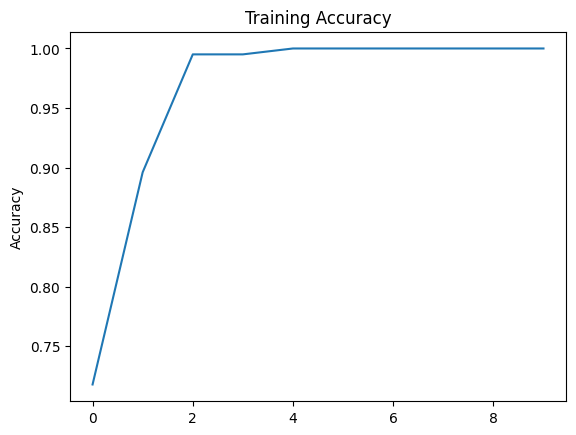

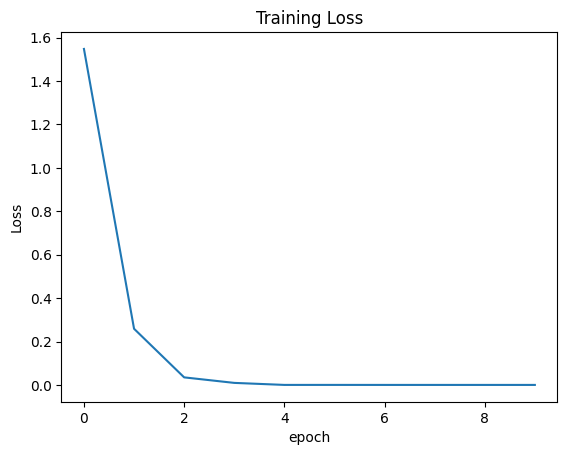

In [116]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [117]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/dog.309.jpg', target_size=(224,224))

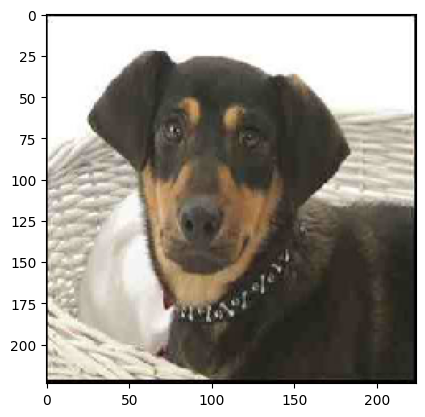

In [118]:
plt.imshow(sample_image)

In [119]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
np.shape(sample_image)

(224, 224, 3)

In [120]:
sample_image = np.expand_dims(sample_image, axis = 0)
np.shape(sample_image)

(1, 224, 224, 3)

In [121]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [122]:
predictions = model.predict(sample_image)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[4.835595e-11 1.000000e+00]]
